In [26]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import matplotlib.pyplot as plt

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_1d9b9b3acee5492680d1a66f5047796d = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='tq1DeU0Iq6Jr6MvKiMB4V4-ZAbD5ctoph0oKIg1_Hsbe',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_1d9b9b3acee5492680d1a66f5047796d.get_object(Bucket='lifeexpectancy-donotdelete-pr-wpc02c7m2vpux8',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [27]:
df_data_1.count()

Country                            2938
Year                               2938
Status                             2938
Life expectancy                    2928
Adult Mortality                    2928
infant deaths                      2938
Alcohol                            2744
percentage expenditure             2938
Hepatitis B                        2385
Measles                            2938
 BMI                               2904
under-five deaths                  2938
Polio                              2919
Total expenditure                  2712
Diphtheria                         2919
 HIV/AIDS                          2938
GDP                                2490
Population                         2286
 thinness  1-19 years              2904
 thinness 5-9 years                2904
Income composition of resources    2771
Schooling                          2775
dtype: int64

In [28]:
#data preprocessing
#rermove None value and split data into train and result data set
from sklearn import preprocessing
df_data_1['Country']=preprocessing.LabelEncoder().fit_transform(df_data_1['Country'])
df_data_1['Status']=preprocessing.LabelEncoder().fit_transform(df_data_1['Status'])
df_data_1=df_data_1.dropna()
df_data_1=df_data_1.reset_index(drop=True)
df_data_1.describe()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,...,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,91.981807,2007.840509,0.853244,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,...,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,55.955879,4.087711,0.353969,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,...,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,0.000000,2000.000000,0.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,...,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,40.000000,2005.000000,1.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,...,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,93.000000,2008.000000,1.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,...,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,139.000000,2011.000000,1.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,...,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,192.000000,2015.000000,1.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,...,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [29]:
#split data into train and result set
data_x=df_data_1[['Country','Status','Year','Alcohol','percentage expenditure',' HIV/AIDS','Total expenditure','GDP','Population','Income composition of resources','Schooling']]
data_y=df_data_1[["Life expectancy "]]

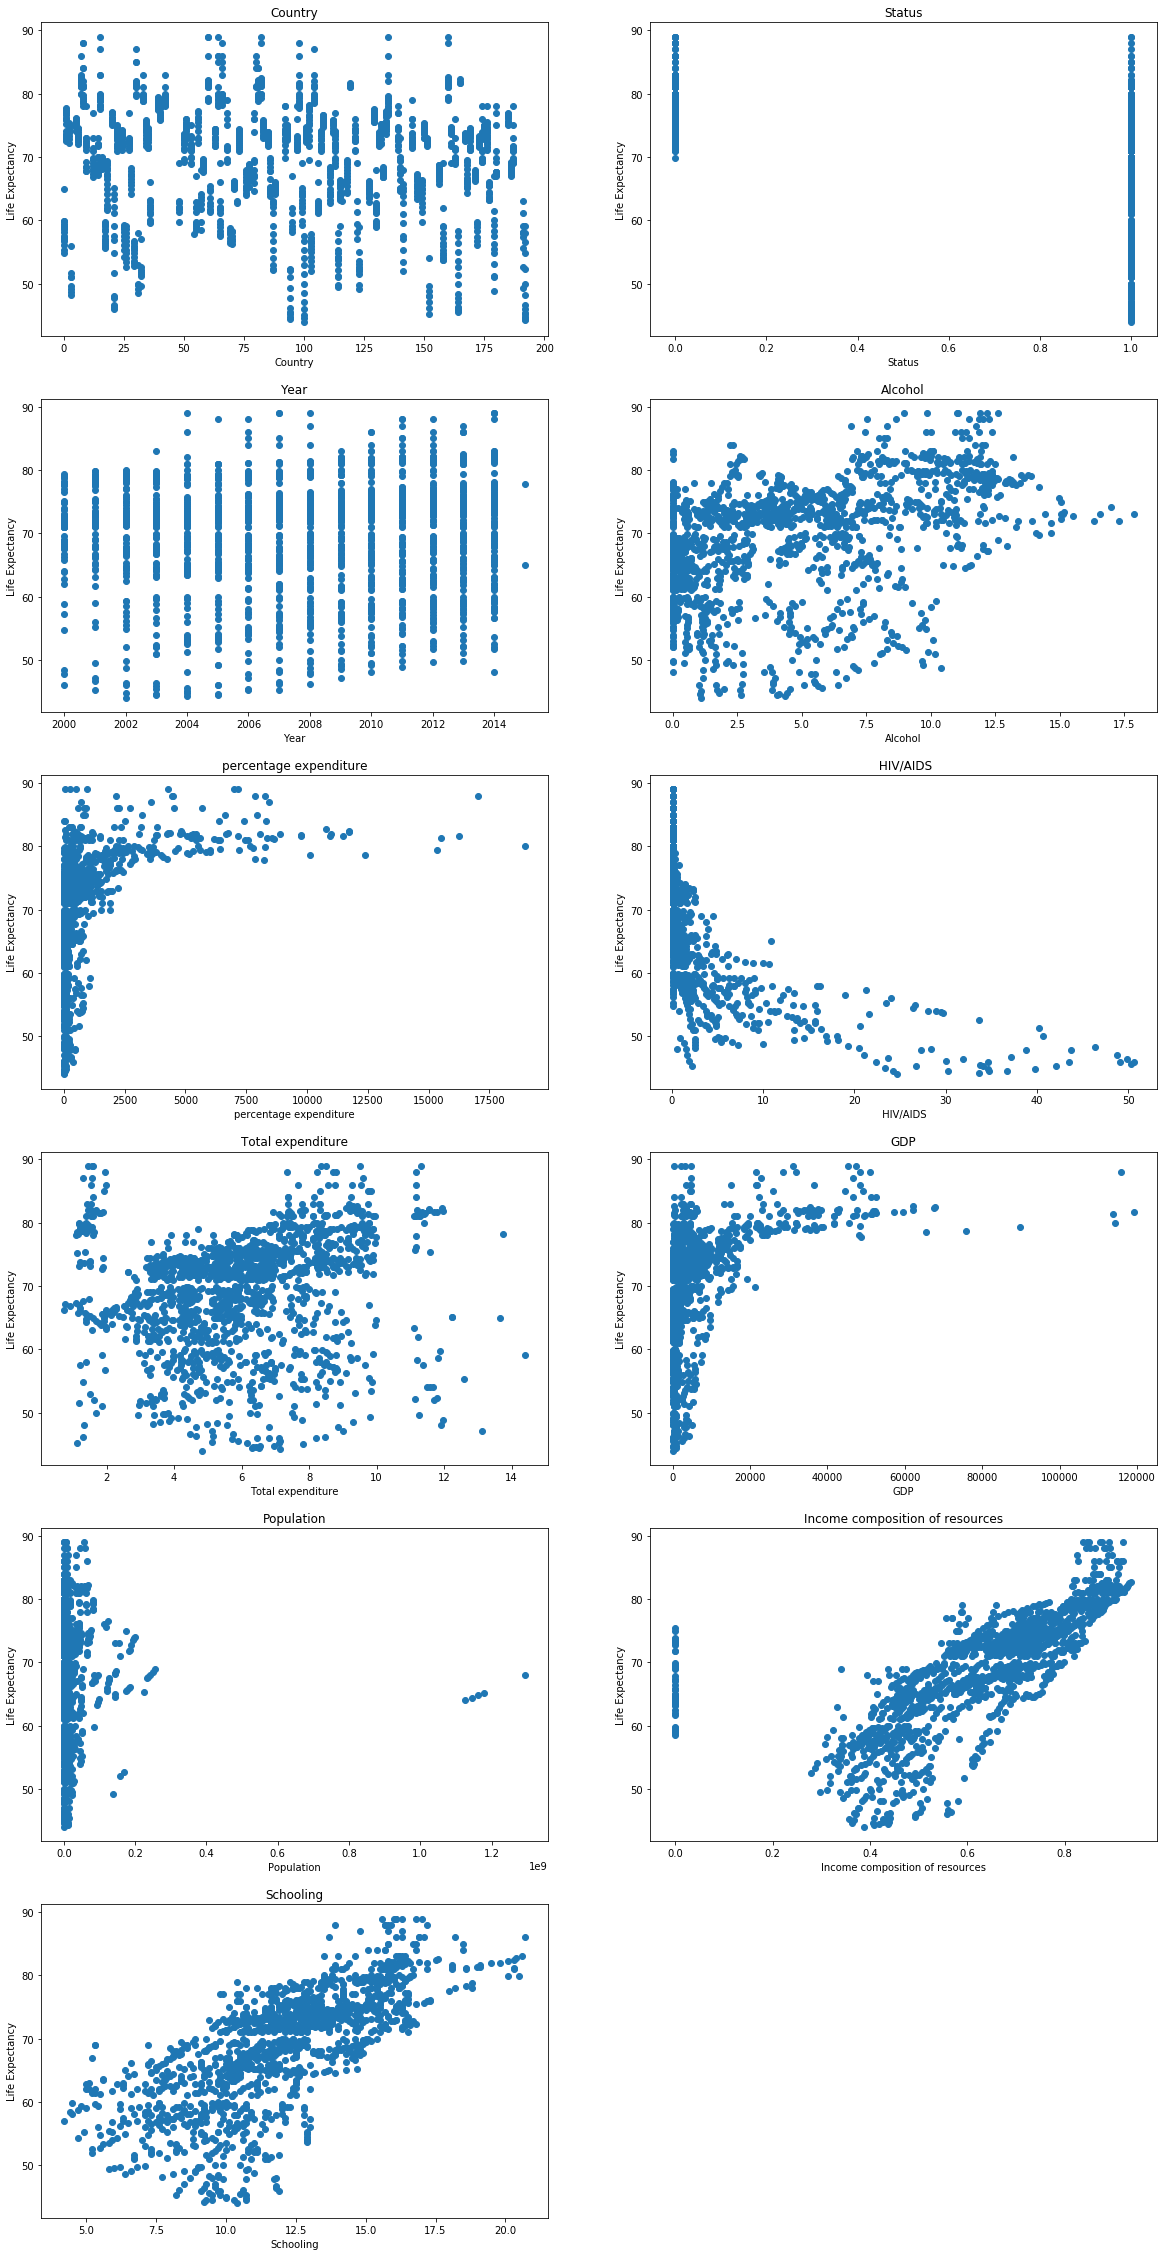

In [30]:
#plot data into scatter plot
column=data_x.columns

plt.figure(figsize=(20,75))
for i in range(len(column)):
    plt.subplot(11,2,i+1)
    plt.scatter(data_x[column[i]],data_y)
    plt.xlabel(column[i])
    plt.ylabel("Life Expectancy")
    plt.title(column[i])

plt.show()
           

In [31]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=3)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (1319, 11) (1319, 1)
Test set: (330, 11) (330, 1)


In [32]:
#model Tranning
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit (x_train, y_train)
# The coefficients
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [[ 1.31641304e-03 -1.32257027e+00 -2.02740199e-01 -2.65864358e-01
   4.22223365e-04 -6.32293619e-01  1.41680928e-01  2.93084912e-05
  -1.31935539e-09  1.51738584e+01  1.21515017e+00]]
Intercept:  [454.25658189]


In [33]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_test_h=model.predict(x_test)
print("R2-score: %.2f" % r2_score(y_test,y_test_h,) )
print("Mean absoult error %.2f" % mean_absolute_error(y_test,y_test_h) )
print("Mean squared error %.2f" % mean_squared_error(y_test,y_test_h) )


R2-score: 0.79
Mean absoult error 3.33
Mean squared error 18.02


In [34]:
wml_credintial={
  "apikey": "gBSTEVG1nGQFsXmOFBs0QRIPXYK_lE5cVblZKxTFjKSp",
  "iam_apikey_description": "Auto-generated for key 1b4aec45-e233-4e07-a12a-f810c854e983",
  "iam_apikey_name": "wdp-writer",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/fbd4f1aac0064f84b2a9c755e5710bc4::serviceid:ServiceId-5fe7b1ab-2d23-4be8-8aa9-ab5f3b032bd6",
  "instance_id": "d50ae4e7-6b61-4d6c-9689-ec866e43145d",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [35]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [36]:
client=WatsonMachineLearningAPIClient(wml_credintial)

In [37]:
model_props={
    client.repository.ModelMetaNames.AUTHOR_NAME :"Digvijay",
    client.repository.ModelMetaNames.AUTHOR_EMAIL :"SI05202000297@smartinternz.com",
    client.repository.ModelMetaNames.NAME : "Life Expectancy"
} 

In [38]:
model_artifacts=client.repository.store_model(model,meta_props=model_props)

In [39]:
model_artifacts

{'metadata': {'guid': 'a4ed11aa-a1b7-4543-9308-3ec342c0fcbe',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/d50ae4e7-6b61-4d6c-9689-ec866e43145d/published_models/a4ed11aa-a1b7-4543-9308-3ec342c0fcbe',
  'created_at': '2020-06-10T10:19:26.072Z',
  'modified_at': '2020-06-10T10:19:26.133Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'learning_configuration_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/d50ae4e7-6b61-4d6c-9689-ec866e43145d/published_models/a4ed11aa-a1b7-4543-9308-3ec342c0fcbe/learning_configuration',
  'author': {'name': 'Digvijay'},
  'name': 'Life Expectancy',
  'learning_iterations_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/d50ae4e7-6b61-4d6c-9689-ec866e43145d/published_models/a4ed11aa-a1b7-4543-9308-3ec342c0fcbe/learning_iterations',
  'feedback_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/d50ae4e7-6b61-4d6c-9689-ec866e43145d/published_models/a4ed11aa-a1b7-4543-9308-3ec342c0fcbe/feedback',
  'latest_version': {'url': 

In [40]:
guid=client.repository.get_model_uid(model_artifacts)

In [41]:
guid

'a4ed11aa-a1b7-4543-9308-3ec342c0fcbe'

In [42]:
deploy=client.deployments.create(guid,name="Life Expectancy")



#######################################################################################

Synchronous deployment creation for uid: 'a4ed11aa-a1b7-4543-9308-3ec342c0fcbe' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='1f24e94c-b691-4768-ba0a-9820a74ba420'
------------------------------------------------------------------------------------------------




In [43]:
client.deployments.list()

------------------------------------  ---------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME             TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
1f24e94c-b691-4768-ba0a-9820a74ba420  Life Expectancy  online  DEPLOY_SUCCESS  2020-06-10T10:19:28.293Z  scikit-learn-0.20  model
------------------------------------  ---------------  ------  --------------  ------------------------  -----------------  -------------


In [44]:
deploy

{'metadata': {'guid': '1f24e94c-b691-4768-ba0a-9820a74ba420',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/d50ae4e7-6b61-4d6c-9689-ec866e43145d/deployments/1f24e94c-b691-4768-ba0a-9820a74ba420',
  'created_at': '2020-06-10T10:19:28.293Z',
  'modified_at': '2020-06-10T10:19:28.560Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'name': 'Life Expectancy',
  'scoring_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/d50ae4e7-6b61-4d6c-9689-ec866e43145d/deployments/1f24e94c-b691-4768-ba0a-9820a74ba420/online',
  'deployable_asset': {'name': 'Life Expectancy',
   'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/d50ae4e7-6b61-4d6c-9689-ec866e43145d/published_models/a4ed11aa-a1b7-4543-9308-3ec342c0fcbe',
   'guid': 'a4ed11aa-a1b7-4543-9308-3ec342c0fcbe',
   'created_at': '2020-06-10T10:19:28.269Z',
   'type': 'model'},
  'description': 'Description of deployment',
  'status_details': {'status': 'DEPLOY_SUCCESS'},
  'model_type': 'scikit-learn-0.20',
  'status':

In [45]:
scoring_url=client.deployments.get_scoring_url(deploy)

In [46]:
scoring_url

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/d50ae4e7-6b61-4d6c-9689-ec866e43145d/deployments/1f24e94c-b691-4768-ba0a-9820a74ba420/online'